<a href="https://colab.research.google.com/github/robssoares/HTML5_CSS/blob/master/Curso_Extensao_(2021)_Exemplo_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalando Bibliotecas


In [ ]:
# Importando bibliotecas
import pandas as pd
import string
import nltk
!pip install --upgrade plotly
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('rslp')
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cosine
import numpy as np
import plotly.express as px


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


# Exemplo de Remoção de Stopwords

In [ ]:
# remoção de pontuacao e stopwords

def remove_stopwords(text,lang,domain_stopwords=[]):
  
  stop_words = nltk.corpus.stopwords.words(lang) # lang='portuguese' or lang='english'
  
  s = str(text).lower() # tudo para caixa baixa
  table = str.maketrans({key: None for key in string.punctuation})
  s = s.translate(table) # remove pontuacao
  tokens = word_tokenize(s) #obtem tokens
  v = [i for i in tokens if not i in stop_words and not i in domain_stopwords and not i.isdigit()] # remove stopwords
  s = ""
  for token in v:
    s += token+" "
  return s.strip()


# exemplos de uso
text = "O estudante de Inteligência Artificial foi na livraria comprar  livros para estudar."
text2 = remove_stopwords(text, 'portuguese')
print('Antes: '+text)
print('Depois: '+text2)

Antes: O estudante de Inteligência Artificial foi na livraria comprar  livros para estudar.
Depois: estudante inteligência artificial livraria comprar livros estudar


# Exemplo de Stemming/Radicalização de Termos

In [ ]:
# stemming
def stemming(text,lang):
  
  stemmer = PorterStemmer() # stemming para ingles
  
  if lang=='portuguese':
    stemmer = nltk.stem.RSLPStemmer() # stemming para portuguese
    
  tokens = word_tokenize(text) #obtem tokens
  
  sentence_stem = ''
  doc_text_stems = [stemmer.stem(i) for i in tokens]
  for stem in doc_text_stems:
    sentence_stem += stem+" "
    
  return sentence_stem.strip()


# exemplos de uso
text = "O estudante de Inteligência Artificial foi na livraria comprar livros para estudar."
text2 = remove_stopwords(text, 'portuguese')
text3 = stemming(text2, 'portuguese')
print('Antes: '+text)
print('Depois: '+text3)

Antes: O estudante de Inteligência Artificial foi na livraria comprar livros para estudar.
Depois: estud intelig artific livr compr livr estud


# Coletando uma Base de Textos para Testar

In [ ]:
# https://www.kaggle.com/datatattle/covid-19-nlp-text-classification
!gdown --id 1Hd0ytKZrR3s22FheUJt4EZOpZ4eWyTrN

Downloading...
From: https://drive.google.com/uc?id=1Hd0ytKZrR3s22FheUJt4EZOpZ4eWyTrN
To: /content/tweets_corona_virus.zip
100% 4.60M/4.60M [00:00<00:00, 28.8MB/s]


In [ ]:
!unzip tweets_corona_virus.zip

Archive:  tweets_corona_virus.zip
  inflating: Corona_NLP_test.csv     
  inflating: Corona_NLP_train.csv    


In [ ]:
dataset = pd.read_csv('Corona_NLP_train.csv',encoding='iso8859')
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
...,...,...,...,...,...,...
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral


In [ ]:
dataset = dataset.dropna().sample(5000)
dataset.reset_index(inplace=True,drop=True)
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,41126,86078,"New York, NY",10-04-2020,"""The least expensive average gas price can be ...",Neutral
1,29036,73988,"Los Angeles, CA / Atlanta. GA",31-03-2020,NO #covid_19 HERE. Just taking this time to de...,Extremely Negative
2,42339,87291,"Toronto, Ontario, Canada",11-04-2020,"Dumped Milk, Smashed Eggs, Plowed Vegetables: ...",Extremely Negative
3,39784,84736,"Detroit, MI",09-04-2020,With unemployment claims reaching record highs...,Extremely Negative
4,22932,67884,Unceded Algonquin territory,24-03-2020,A lot of our families just don t have the eco...,Positive
...,...,...,...,...,...,...
4995,32744,77696,Ohio Attorney General's Office,05-04-2020,The Guardian (United Kingdom)\r\r\nRuby Prince...,Extremely Negative
4996,36395,81347,"near Washington, DC",07-04-2020,kelly2 If you re a germaphobe afraid of the gr...,Positive
4997,29573,74525,sales@esmmagazine.com,01-04-2020,.@ConagraBrands raised its financial expectati...,Positive
4998,7939,52891,"Milton, Canada",18-03-2020,Oil prices at $22.90\r\r\n#Oilprices #coronavi...,Neutral


# Computando uma Bag-of-Words e aplicando TFIDF

In [ ]:
# obtendo a VSM com TFIDF
def compute_vsm_tfidf(dataset,lang,domain_stopwords=[]):
  
  d = []
  for index,row in dataset.iterrows():
    text = row['OriginalTweet'] 
    text2 = remove_stopwords(text, lang,domain_stopwords)
    text3 = stemming(text2, lang)
    d.append(text3)
  
  matrix = TfidfVectorizer(max_features=700,)
  X = matrix.fit_transform(d)
  
  tfidf_vect_df = pd.DataFrame(X.todense(), columns=matrix.get_feature_names())

  return tfidf_vect_df


vsm = compute_vsm_tfidf(dataset,'english')
vsm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abl,absolut,access,accord,across,act,action,activ,actual,ad,advantag,advic,affect,afford,ago,agricultur,aisl,alcohol,allow,almost,alreadi,also,alway,amazon,america,american,amid,among,amp,announc,anoth,answer,anyon,anyth,apart,app,appreci,april,area,around,...,via,video,viru,visit,volunt,vulner,wait,wake,walk,walmart,want,war,warn,wash,watch,water,way,wear,websit,week,well,went,weâ,whole,wipe,without,woman,wonder,work,worker,world,worri,worst,would,ye,year,yesterday,yet,your,youâ
0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.385443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.376433,0.0,0.0,0.0,0.0,0.329987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.284608,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.325454,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.318748,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.000000,0.0,0.0,0.0,0.273801,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00

# Agrupamento com k-Means

In [ ]:
# preparando os dados para o k-means

X = np.array(vsm)
length = np.sqrt((X**2).sum(axis=1))[:,None]
X = X / length
X = np.array(pd.DataFrame(X).fillna(0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


Ao normalizar os vetores, podemos usar k-means com distância euclidiana. Prova:

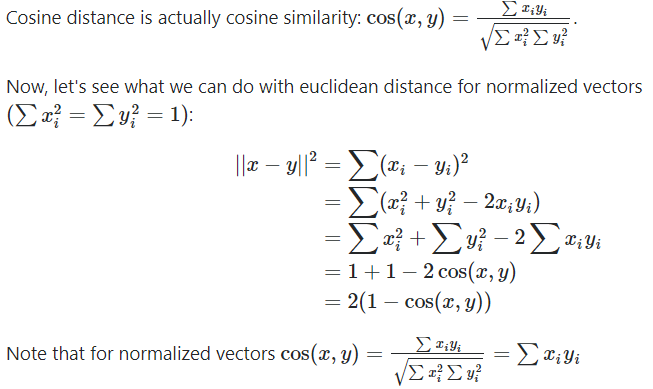

# Agrupando os Textos

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=15).fit(X)

In [ ]:
dataset['cluster'] = kmeans.labels_
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cluster
0,41126,86078,"New York, NY",10-04-2020,"""The least expensive average gas price can be ...",Neutral,2
1,29036,73988,"Los Angeles, CA / Atlanta. GA",31-03-2020,NO #covid_19 HERE. Just taking this time to de...,Extremely Negative,3
2,42339,87291,"Toronto, Ontario, Canada",11-04-2020,"Dumped Milk, Smashed Eggs, Plowed Vegetables: ...",Extremely Negative,7
3,39784,84736,"Detroit, MI",09-04-2020,With unemployment claims reaching record highs...,Extremely Negative,7
4,22932,67884,Unceded Algonquin territory,24-03-2020,A lot of our families just don t have the eco...,Positive,14
...,...,...,...,...,...,...,...
4995,32744,77696,Ohio Attorney General's Office,05-04-2020,The Guardian (United Kingdom)\r\r\nRuby Prince...,Extremely Negative,7
4996,36395,81347,"near Washington, DC",07-04-2020,kelly2 If you re a germaphobe afraid of the gr...,Positive,3
4997,29573,74525,sales@esmmagazine.com,01-04-2020,.@ConagraBrands raised its financial expectati...,Positive,11
4998,7939,52891,"Milton, Canada",18-03-2020,Oil prices at $22.90\r\r\n#Oilprices #coronavi...,Neutral,2


In [ ]:
from sklearn import metrics
dataset['silhouette'] = metrics.silhouette_samples(X, kmeans.labels_)
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cluster,silhouette
0,41126,86078,"New York, NY",10-04-2020,"""The least expensive average gas price can be ...",Neutral,2,0.024957
1,29036,73988,"Los Angeles, CA / Atlanta. GA",31-03-2020,NO #covid_19 HERE. Just taking this time to de...,Extremely Negative,3,0.030478
2,42339,87291,"Toronto, Ontario, Canada",11-04-2020,"Dumped Milk, Smashed Eggs, Plowed Vegetables: ...",Extremely Negative,7,-0.016593
3,39784,84736,"Detroit, MI",09-04-2020,With unemployment claims reaching record highs...,Extremely Negative,7,-0.004712
4,22932,67884,Unceded Algonquin territory,24-03-2020,A lot of our families just don t have the eco...,Positive,14,0.015120
...,...,...,...,...,...,...,...,...
4995,32744,77696,Ohio Attorney General's Office,05-04-2020,The Guardian (United Kingdom)\r\r\nRuby Prince...,Extremely Negative,7,0.000390
4996,36395,81347,"near Washington, DC",07-04-2020,kelly2 If you re a germaphobe afraid of the gr...,Positive,3,-0.009008
4997,29573,74525,sales@esmmagazine.com,01-04-2020,.@ConagraBrands raised its financial expectati...,Positive,11,0.000802
4998,7939,52891,"Milton, Canada",18-03-2020,Oil prices at $22.90\r\r\n#Oilprices #coronavi...,Neutral,2,0.041961


In [ ]:
# vamos escolher representantes de cada cluster de acordo com o maior valor de silhouette

representantes = {}
for cluster in dataset.cluster.unique():
  representantes[cluster] = dataset[dataset.cluster==cluster].sort_values(by='silhouette',ascending=False).head(1).OriginalTweet.to_list()[0]


In [ ]:
representantes

{0: 'Toilet paper anyone  ',
 1: 'stop panic buying you mongs\r\r\n\r\r\nhttps://t.co/kbb2WkfU2H',
 2: '#ShaleLaw HotLink: "Oil Companies on Tumbling Prices: Â\x91Disastrous, DevastatingÂ\x92" https://t.co/HjVwbTAd1P @ClimateNexus @nytimes #oilcompanies #prices #coronavirus #oilandgas #budgets #gasoline #diesel #jetfuel #pipeline #crudeoil #pipeline #storagetanks #frackingcrews https://t.co/FkIl0IWOyF',
 3: 'Paranoid after the grocery store',
 4: 'A SHOT AT BEATING #CORONAVIRUS: TitoÂ\x92s Vodka now making its own hand sanitizer https://t.co/KG7zfvhEfN #Texas',
 5: 'Even in a crisis there must be checks &amp; balances &amp; govt canÂ\x92t operate unrestrained. I encourage @GovMurphy to reconsider his park closures &amp; appeal to the #NJ legislature to convene &amp; act #NJGOP #LeadRight https://t.co/LhNylxV5SB',
 6: 'Meanwhile a villager of quenching her thirsty in a supermarket somewhere in Africa  19 naka g',
 7: 'Check out AG Ferguson on warning about scams and also raising awarene

In [ ]:
L = []
for index,row in dataset.iterrows():
  L.append(representantes[row['cluster']])
dataset['representantes'] = L
dataset

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,cluster,silhouette,representantes
0,41126,86078,"New York, NY",10-04-2020,"""The least expensive average gas price can be ...",Neutral,2,0.024957,"#ShaleLaw HotLink: ""Oil Companies on Tumbling ..."
1,29036,73988,"Los Angeles, CA / Atlanta. GA",31-03-2020,NO #covid_19 HERE. Just taking this time to de...,Extremely Negative,3,0.030478,Paranoid after the grocery store
2,42339,87291,"Toronto, Ontario, Canada",11-04-2020,"Dumped Milk, Smashed Eggs, Plowed Vegetables: ...",Extremely Negative,7,-0.016593,Check out AG Ferguson on warning about scams a...
3,39784,84736,"Detroit, MI",09-04-2020,With unemployment claims reaching record highs...,Extremely Negative,7,-0.004712,Check out AG Ferguson on warning about scams a...
4,22932,67884,Unceded Algonquin territory,24-03-2020,A lot of our families just don t have the eco...,Positive,14,0.015120,Stock Up on Chicken Soup! KOZAK Ukrainian Bake...
...,...,...,...,...,...,...,...,...,...
4995,32744,77696,Ohio Attorney General's Office,05-04-2020,The Guardian (United Kingdom)\r\r\nRuby Prince...,Extremely Negative,7,0.000390,Check out AG Ferguson on warning about scams a...
4996,36395,81347,"near Washington, DC",07-04-2020,kelly2 If you re a germaphobe afraid of the gr...,Positive,3,-0.009008,Paranoid after the grocery store
4997,29573,74525,sales@esmmagazine.com,01-04-2020,.@ConagraBrands raised its financial expectati...,Positive,11,0.000802,Consumer Corner: Intentional COVID-19 Price-Go...
4998,7939,52891,"Milton, Canada",18-03-2020,Oil prices at $22.90\r\r\n#Oilprices #coronavi...,Neutral,2,0.041961,"#ShaleLaw HotLink: ""Oil Companies on Tumbling ..."


# Visualizando os resultados

In [ ]:
fig = px.treemap(dataset, path=[px.Constant("Dataset"), 'cluster','representantes'])
fig.show()

In [ ]:
fig = px.treemap(dataset, path=[px.Constant("Dataset"), 'cluster','Sentiment'])
fig.show()

In [ ]:
fig = px.treemap(dataset, path=[px.Constant("Dataset"), 'cluster','Location'])
fig.show()